## PINN for 10D heat equation

#### Defining the problem:
$$\frac{d}{dt}u(\vec x,t)=\alpha\sum_{i=1}^{10}\frac{d^2}{dx_i^2}u(\vec x,t)$$

$$\vec x\in[0,1]^{10}$$

Initial and boundary conditions:

$$u(\vec x,0) = \sin(\pi x_1)\sin(2\pi x_2)\sin(\pi x_3)\sin(\pi x_4)...\sin(\pi x_{10})$$

On boundaries, $u(\vec x,t)=0$.

#### Boundary conditions are enforced with a hard constraint:
* Model is defined as $u_\theta(x,t)=\left(\Pi_{i=1}^{10} 4x_i(1-x_i)\right)g_\theta(\vec x,t)$
* $g_\theta(\vec x,t)$ is a multilayer perceptron with parameters $\theta$.

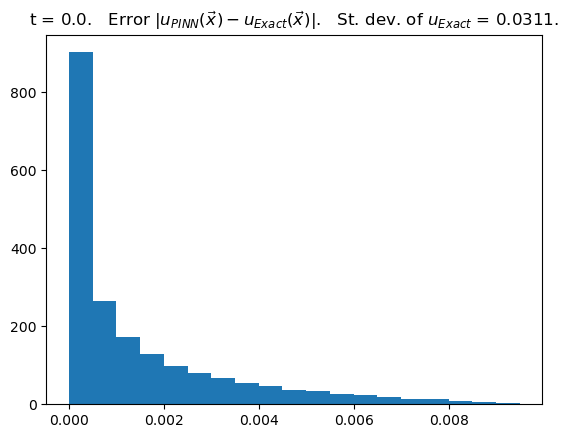

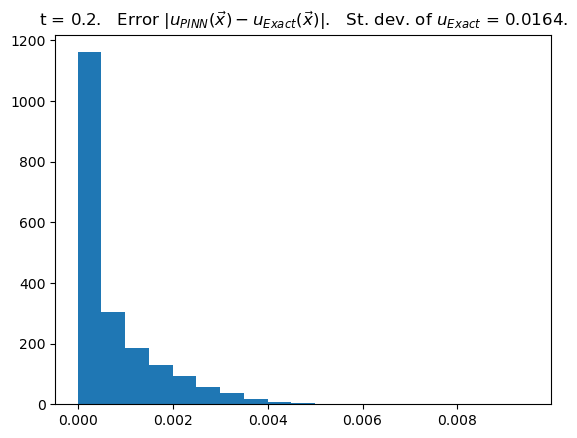

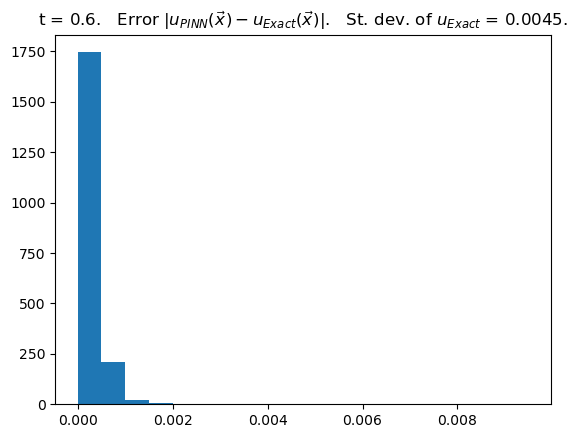

In [1]:
"""
- For several values of t, evaluate PINN on 100,000 randomly-selected points in space.
- Plot histogram of errors

"""


import torch
from model_architecture import PINN
import matplotlib.pyplot as plt
pi = 3.1415926535898


def exact_solution(x_list, t):
    return torch.sin(pi*x_list[0])*torch.sin(2*pi*x_list[1])*torch.sin(pi*x_list[2])*torch.sin(pi*x_list[3]) \
          *torch.sin(pi*x_list[4])*torch.sin(pi*x_list[5])*torch.sin(pi*x_list[6])*torch.sin(pi*x_list[7]) \
          *torch.sin(pi*x_list[8])*torch.sin(pi*x_list[9])*torch.exp(-13*alpha*pi**2*t)

alpha = 0.025  # Thermal diffusivity
spatial_dim = 10

# Load PINN model
model = PINN(input_dim=spatial_dim+1,hidden_dim=128, num_layers=4)
model.load_state_dict(torch.load('weights1.pth'))

model.eval()

num_test_points = 100000
test_points = [torch.rand(num_test_points,1) for i in range(spatial_dim)]

times = torch.tensor([0.0, 0.2, 0.6])

bins = torch.arange(0,.01,.0005)#[0,0.001,0.002,0.003,0.004]
for i, t in enumerate(times):
    T = t * torch.ones(num_test_points,1)
    with torch.no_grad():
        U = model(test_points, T)

    U_exact = exact_solution(test_points, T)
    
    abs_diff = torch.abs(U - U_exact).flatten()
    std_exact = torch.std(U_exact)

    plt.figure()
    plt.hist(abs_diff, bins=bins, density=True)
    plt.title(f't = {t.item():.1f}.' + r'   Error $|u_{PINN}(\vec x)-u_{Exact}(\vec x)|$.   St. dev. of $u_{Exact}$ = ' + f'{std_exact:.4f}.')
